In [64]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree
import re
#stopwords = nltk.corpus.stopwords.words('English')
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np
#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [40]:
#the extracted cleaned tweets
tweets = pd.read_csv('phone_tweets.csv')
#generated word feature dataset
word_feature = pd.read_csv('word_features.csv')

Question 1

In [45]:
#convert into dictionary
feature_count = dict(word_feature.values)
#convert into list
tweets_list= tweets['Tweets'].to_list()

In [48]:
#find the threshold value to extract only important and most frequent feature
res = 0
for val in word_feature['Count']:
    res += val
  #using len() to get total keys for mean computation
res = res / len(word_feature['Count'])
print(res)

7188.855194477184


In [221]:
# Select frequent feature threshold for average value of each count
# This is an arbitrary decision as of now.
counts = list(feature_count.values())
features = list(feature_count.keys())
threshold = round(res)
#threshold=66

#print("Threshold:" + str(threshold))

frequent_features = list()

for feature, count in feature_count.items():
    if count >= threshold:
        if feature in sorted(feature_count, key=feature_count.get, reverse=True)[:50]:
            frequent_features.append(feature)
#print(' Features:')
#frequent_features=frequent_features[0:3]
#frequent_features

In [222]:
len(frequent_features)

50

In [223]:
#keep only those tweets which are in word features
final_dict = []
# For each frequent feature
for f in frequent_features:
    for comment in tweets_list:
        #q = '|'.join(f.split())
        #find = re.search(r'\w*(' + str(f) + ')\w*', str(comment))
        if re.search(r'\w*(' + str(f) + ')\w*', str(comment)):
            if comment not in final_dict:
            #absa_list[f].append(sentence)
                final_dict.append(comment)

In [224]:
len(final_dict)

725

In [225]:
#store the final dictionary output
temp = {'Most_opinions': final_dict}
result = pd.DataFrame(data=temp)

In [247]:
list(result['Most_opinions'][:10])

['daily routine use phone charge phone use phone charging',
 'send calls another user cell phone press button multiple transfer buttons phone know user available phone check website voip voipservices callhandeling',
 'pull screenshot phone rub ypur phone persons called networking digital age',
 'dumb shit watch movie phone night phone dead',
 'rainbow garden mobile phone photo',
 'day collide chocar inktober inktober pencils paper cellphone smartphone mobile phone street walk girl boy style art illustration ink blackandwhite biticol staedler fineliner',
 'mini crossbody phone purse mobile sling bag cross body purse linen padded phone sleeve chezvies etsy',
 'dc get lawyers phone lawyers phone looking bag',
 'hi poppy please send us direct message case number looked please include full post code phone number email address reg number thank mt',
 'sorta keep refreshing roblox login screen phone daughters phone talk stress x']

In [226]:
#function to create word frequency
def word_frequency(sentence):
# joins all the sentenses
    sentence =" ".join(sentence)
    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in  nltk.corpus.stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    #counts the words, pairs and trigrams
    #counted = Counter(new_tokens)
    #counted_2= Counter(ngrams(new_tokens,2))
    counted= Counter(ngrams(new_tokens,2))
    trigrams =pd.DataFrame(counted.items(),columns=['words','frequency']).sort_values(by='frequency',ascending=False)
    return trigrams

In [248]:
#to visualize the most frequent words in opinion
viz = word_frequency(result['Most_opinions'])[10:40]
len(viz)

30

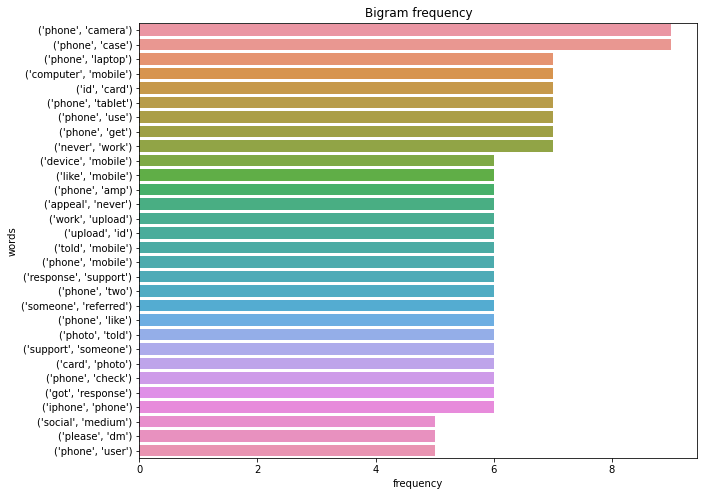

In [250]:
#fig, axes = plt.subplots(ax.set_ylim(1.5, 5.5),figsize=(8,20))
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='frequency',y='words',data=viz.head(30))
#sns.barplot(x='frequency',y='words',data=rfw2.head(30))
plt.title('Bigram frequency')
plt.savefig('question1.png', dpi=300, bbox_inches='tight')
plt.show()

Question 2

In [251]:
#filter_word = []
oppo_count=0
xiaomi_count=0
huawei_count=0
samsung_count=0
apple_count=0
sony_count=0
vivo_count=0
motorola_count=0
asus_count=0
nokia_count=0

for word in tweets_list:
    if re.search(r'\w*(' + 'oppo' + ')\w*', str(word)):
        oppo_count+=1
    elif re.search(r'\w*(' + 'xiaomi' + ')\w*', str(word)):
        xiaomi_count+=1
    elif re.search(r'\w*(' + 'huawei' + ')\w*', str(word)):
        huawei_count+=1
    elif re.search(r'\w*(' + 'samsung' + ')\w*', str(word)):
        samsung_count+=1
    elif re.search(r'\w*(' + 'apple' + ')\w*', str(word)):
        apple_count+=1
    elif re.search(r'\w*(' + 'sony' + ')\w*', str(word)):
        sony_count+=1
    elif re.search(r'\w*(' + 'vivo' + ')\w*', str(word)):
        vivo_count+=1
    elif re.search(r'\w*(' + 'motorola' + ')\w*', str(word)):
        motorola_count+=1
    elif re.search(r'\w*(' + 'asus' + ')\w*', str(word)):
        asus_count+=1
    elif re.search(r'\w*(' + 'nokia' + ')\w*', str(word)):
        nokia_count+=1
        
#filter_word.append(word)
"""print(oppo_count)
print(xiaomi_count)
print(huawei_count)
print(samsung_count)
print(apple_count)
print(sony_count)
print(vivo_count)
print(motorola_count)
print(asus_count)
print(nokia_count)"""

'print(oppo_count)\nprint(xiaomi_count)\nprint(huawei_count)\nprint(samsung_count)\nprint(apple_count)\nprint(sony_count)\nprint(vivo_count)\nprint(motorola_count)\nprint(asus_count)\nprint(nokia_count)'

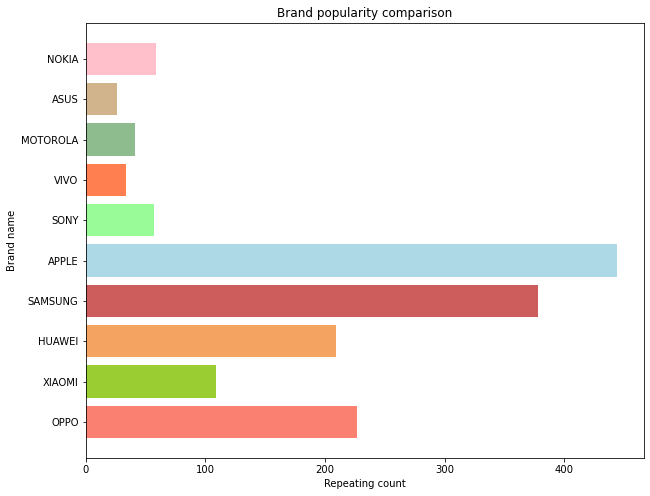

In [252]:

height = [oppo_count,xiaomi_count,huawei_count,samsung_count,apple_count,sony_count,vivo_count,motorola_count,asus_count
          ,nokia_count]
bars = ('OPPO',"XIAOMI",'HUAWEI','SAMSUNG','APPLE','SONY','VIVO','MOTOROLA','ASUS','NOKIA')
x_pos = np.arange(len(bars))

plt.figure(figsize=(10,8))
 
# Create bars
plt.barh(x_pos, height,color=['salmon','yellowgreen','sandybrown','indianred','lightblue','palegreen','coral','darkseagreen','tan','pink'])
 
# Create names on the x-axis
plt.yticks(x_pos, bars)
plt.title('Brand popularity comparison')
plt.ylabel('Brand name')
plt.xlabel('Repeating count')
plt.savefig('question2.png', dpi=300, bbox_inches='tight')

Question 3

In [184]:
sid = SentimentIntensityAnalyzer()

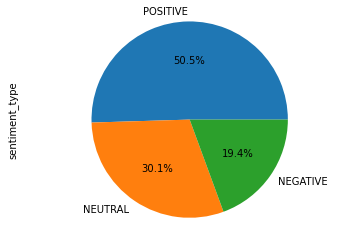

In [259]:
#samsung
inputfile = open("cleaned_samsung.txt", "r",encoding="utf-8")
df1 = pd.DataFrame(data = inputfile)

df1['polarity'] = df1[0].apply(lambda Description: sid.polarity_scores(Description))

df1['compound'] = df1['polarity'].apply(lambda score_dict: score_dict['compound'])
df1['sentiment_type']=''
df1.loc[df1.compound>0,'sentiment_type']='POSITIVE'
df1.loc[df1.compound==0,'sentiment_type']='NEUTRAL'
df1.loc[df1.compound<0,'sentiment_type']='NEGATIVE'


df1['sentiment_type'].value_counts().plot.pie(autopct='%1.1f%%',)
plt.axis('equal')

plt.savefig('samsung_pie.png', dpi=300, bbox_inches='tight')
plt.show()

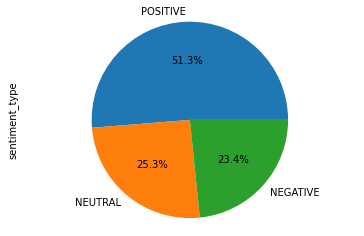

In [260]:
#apple
inputfile = open("cleaned_apple.txt", "r",encoding="utf-8")
df1 = pd.DataFrame(data = inputfile)

df1['polarity'] = df1[0].apply(lambda Description: sid.polarity_scores(Description))

df1['compound'] = df1['polarity'].apply(lambda score_dict: score_dict['compound'])
df1['sentiment_type']=''
df1.loc[df1.compound>0,'sentiment_type']='POSITIVE'
df1.loc[df1.compound==0,'sentiment_type']='NEUTRAL'
df1.loc[df1.compound<0,'sentiment_type']='NEGATIVE'


df1['sentiment_type'].value_counts().plot.pie(autopct='%1.1f%%',)
plt.axis('equal')

plt.savefig('apple_pie.png', dpi=300, bbox_inches='tight')
plt.show()

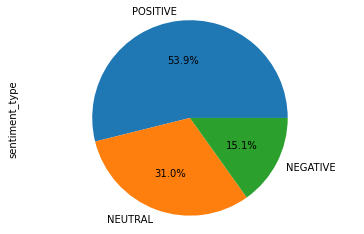

In [261]:
#huawei
inputfile = open("cleaned_huawei.txt", "r",encoding="utf-8")
df1 = pd.DataFrame(data = inputfile)

df1['polarity'] = df1[0].apply(lambda Description: sid.polarity_scores(Description))

df1['compound'] = df1['polarity'].apply(lambda score_dict: score_dict['compound'])
df1['sentiment_type']=''
df1.loc[df1.compound>0,'sentiment_type']='POSITIVE'
df1.loc[df1.compound==0,'sentiment_type']='NEUTRAL'
df1.loc[df1.compound<0,'sentiment_type']='NEGATIVE'


df1['sentiment_type'].value_counts().plot.pie(autopct='%1.1f%%',)
plt.axis('equal')

plt.savefig('huawei_pie.png', dpi=300, bbox_inches='tight')
plt.show()

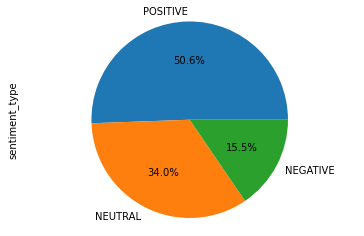

In [262]:
#oppo
inputfile = open("cleaned_oppo.txt", "r",encoding="utf-8")
df1 = pd.DataFrame(data = inputfile)

df1['polarity'] = df1[0].apply(lambda Description: sid.polarity_scores(Description))

df1['compound'] = df1['polarity'].apply(lambda score_dict: score_dict['compound'])
df1['sentiment_type']=''
df1.loc[df1.compound>0,'sentiment_type']='POSITIVE'
df1.loc[df1.compound==0,'sentiment_type']='NEUTRAL'
df1.loc[df1.compound<0,'sentiment_type']='NEGATIVE'


df1['sentiment_type'].value_counts().plot.pie(autopct='%1.1f%%',)
plt.axis('equal')

plt.savefig('oppo.png', dpi=300, bbox_inches='tight')
plt.show()

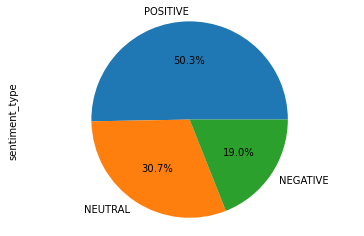

In [263]:
#xiaomi
inputfile = open("cleaned_xiaomi.txt", "r",encoding="utf-8")
df1 = pd.DataFrame(data = inputfile)

df1['polarity'] = df1[0].apply(lambda Description: sid.polarity_scores(Description))

df1['compound'] = df1['polarity'].apply(lambda score_dict: score_dict['compound'])
df1['sentiment_type']=''
df1.loc[df1.compound>0,'sentiment_type']='POSITIVE'
df1.loc[df1.compound==0,'sentiment_type']='NEUTRAL'
df1.loc[df1.compound<0,'sentiment_type']='NEGATIVE'


df1['sentiment_type'].value_counts().plot.pie(autopct='%1.1f%%',)
plt.axis('equal')


plt.savefig('xiaomi_pie.png', dpi=300, bbox_inches='tight')
plt.show()